# Chapter 06: Matrices, Part 2

## Concepts

In [89]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Matrix Norm (Frobenius)

matrix_a = np.random.randn(3, 3)

def frobenius_norm(matrix):
    sum_squares = 0
    for row in matrix:
        for element in row:
            sum_squares += element ** 2
    return sum_squares ** 0.5

def frobenius_norm_trace_method(matrix):
    return np.sqrt(np.trace(matrix @ matrix.T))

# Calculate the Frobenius norm with different methods
frobenius_norm_a = np.linalg.norm(matrix_a, 'fro')
frobenius_norm_b = frobenius_norm(matrix_a)
frobenius_norm_c = frobenius_norm_trace_method(matrix_a)
method_check = frobenius_norm_a == frobenius_norm_b == frobenius_norm_c

print("Random Matrix A:", "\n", matrix_a, "\n")
print("Frobenius Norm of A:", frobenius_norm_a, "\n")
print("Scratch methods match numpy implementaiton answer:", method_check)

Random Matrix A: 
 [[-0.33854911 -1.10982668  0.98947699]
 [ 0.52946188  0.19146929 -0.41350115]
 [-0.38293466  1.30739271 -1.88765237]] 

Frobenius Norm of A: 2.8692359921842794 

Scratch methods match numpy implementaiton answer: True


In [44]:
# Matrix Trace (Sum of diagonal elements)

matrix_a = np.random.randn(4, 4)

def matrix_trace(matrix):
    trace = 0
    for i in range(len(matrix)):
        trace += matrix[i][i]
    return trace
            

matrix_trace_a = np.trace(matrix_a)
matrix_trace_b = matrix_trace(matrix_a)
method_check = matrix_trace_a == matrix_trace_b

print("Matrix A:", "\n", matrix_a, "\n")
print("Trace of A:", matrix_trace_a, "\n")
print("Scratch methods match numpy implementaiton answer:", method_check)

Matrix A: 
 [[-0.25913831  0.70770955  1.30725195 -0.83340797]
 [-1.55749691  0.28195571  0.62658679 -0.80314645]
 [-1.7444235  -0.09386249 -3.35627243  0.89972117]
 [ 1.66765642  1.58168147 -0.95307876  0.04692725]] 

Trace of A: -3.2865277823685686 

Scratch methods match numpy implementaiton answer: True


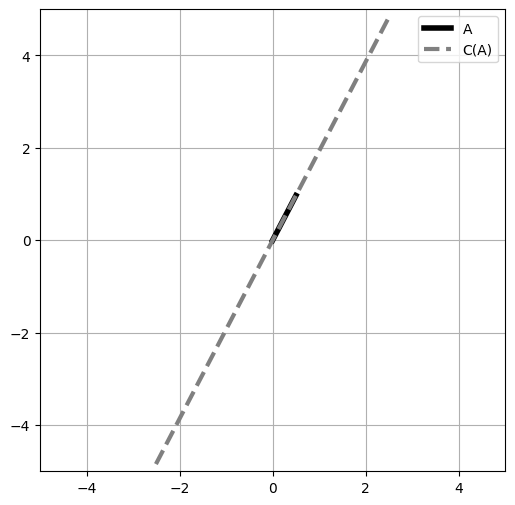

In [61]:
# Column Spaces (just one lonely little column)

matrix_a = np.random.rand(2,1)

xlim = [-5,5]
colspace_p1 = xlim[0] * matrix_a
colspace_p2 = xlim[1] * matrix_a

plt.figure(figsize=(6, 6))
plt.plot([0, matrix_a[0, 0]], [0, matrix_a[1, 0]], 'k', linewidth=4, label='A')
plt.plot([colspace_p1[0, 0], colspace_p2[0, 0]], [colspace_p1[1, 0], colspace_p2[1, 0]],
         '--', linewidth=3, color='grey', label='C(A)')
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.show()

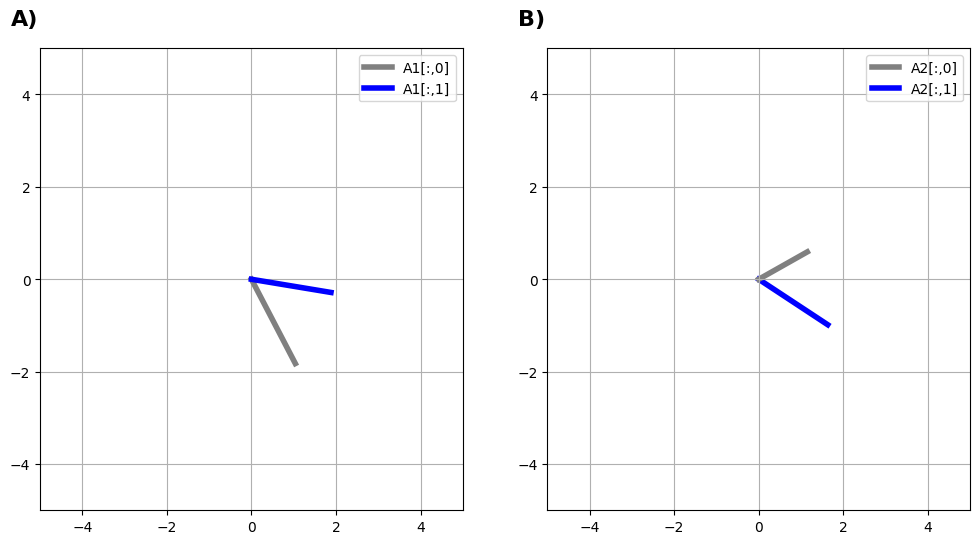

In [74]:
# Column Spaces (2D)

# some matrix
matrix_a = np.random.randn(2, 2)
matrix_b = np.random.randn(2, 2)

xlim = [-5, 5]
color = ["grey", "blue"]

_,axs = plt.subplots(1, 2, figsize=(12, 6))
for i in range(2):
  axs[0].plot([0,matrix_a[0, i]], [0,matrix_a[1, i]], color=color[i], linewidth=4)
  axs[1].plot([0,matrix_b[0, i]], [0,matrix_b[1, i]], color=color[i], linewidth=4, zorder=-i)
  axs[i].set_xlim(xlim)
  axs[i].set_ylim(xlim)
  axs[i].grid()
  axs[i].text(xlim[0]-.7, xlim[1]+.5, f'{"AB"[i]})', fontweight='bold', fontsize=16)

for i in [0, 1]: 
   axs[i].legend([f'A{i+1}[:,0]', f'A{i+1}[:,1]'])

plt.show()

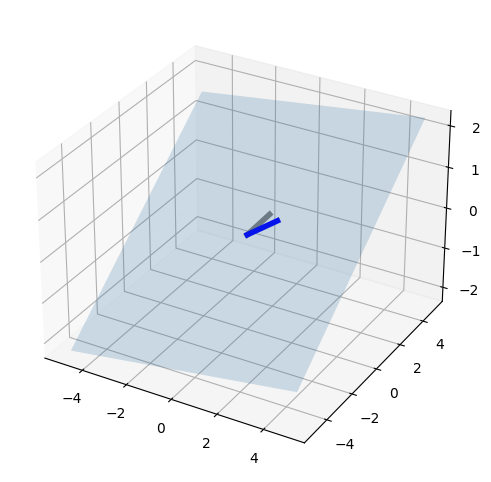

In [88]:
# Column Spaces (3D)

matrix_a = np.random.rand(3, 2)

ax = plt.figure(figsize=(6, 6)).add_subplot(111, projection='3d')

# Plot the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 10),np.linspace(-5, 5, 10))
cp = np.cross(matrix_a[:,0], matrix_a[:,1])
z1 = (-cp[0] * xx - cp[1] * yy) / cp[2]
ax.plot_surface(xx, yy, z1, alpha=.2)

# Plot the vectors
ax.plot([0, matrix_a[0, 0]],[0, matrix_a[1, 0]],[0, matrix_a[2, 0]], color=color[0], linewidth=4)
ax.plot([0, matrix_a[0, 1]],[0, matrix_a[1, 1]],[0, matrix_a[2, 1]], color=color[1], linewidth=4)

plt.show()

In [90]:
# Null Spaces

matrix_a = np.array([ [1,-1],[-2,2] ])
matrix_b = np.array([ [1,-1],[-2,3] ])

print(scipy.linalg.null_space(matrix_a), "\n")
print(scipy.linalg.null_space(matrix_b))

[[0.70710678]
 [0.70710678]] 

[]


In [96]:
# Matrix Rank

matrix_a = np.random.randn(3, 3)
matrix_b = np.array(
    [
        [1, 2, 3],
        [2, 4, 6],
        [-12, 3, 9]
    ]
)
matrix_c = np.array(
    [
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]
    ]
)

matrix_a_rank = np.linalg.matrix_rank(matrix_a)
matrix_b_rank = np.linalg.matrix_rank(matrix_b)
matrix_c_rank = np.linalg.matrix_rank(matrix_c)

print("Matrix A:", "\n", matrix_a, "\n")
print("Rank of Matrix A:", matrix_a_rank, "\n")

print("Matrix B:", "\n", matrix_b, "\n")
print("Rank of Matrix B:", matrix_b_rank, "\n")

print("Matrix C:", "\n", matrix_c, "\n")
print("Rank of Matrix C:", matrix_c_rank)

Matrix A: 
 [[ 0.6527843  -1.36676495  0.48583265]
 [-0.87045756 -1.15423407  1.1948213 ]
 [ 0.41027708 -0.06964645 -0.19083306]] 

Rank of Matrix A: 3 

Matrix B: 
 [[  1   2   3]
 [  2   4   6]
 [-12   3   9]] 

Rank of Matrix B: 2 

Matrix C: 
 [[1 1 1]
 [2 2 2]
 [3 3 3]] 

Rank of Matrix C: 1


In [109]:
# Matrix Rank (Special Matrices)

# Vectors
vector = np.random.rand(1,3)
print("Vector:", "\n", vector, "\n")
print("Rank of Vector:", np.linalg.matrix_rank(vector), "\n")

# Zeros Matrices
zeros_matrix = np.zeros(shape=(3, 3))
print("Zeros Matrix:", "\n", zeros_matrix, "\n")
print("Rank of Zeros Matrix:", np.linalg.matrix_rank(zeros_matrix), "\n")

# Identity Matrices
identity_matrix = np.eye(3)
print("Identity Matrix:", "\n", identity_matrix, "\n")
print("Rank of Identity Matrix:", np.linalg.matrix_rank(identity_matrix), "\n")

# Diagonal Matrices
diagonal_matrix = np.diag([1, 2, 3])
print("Diagonal Matrix:", "\n", diagonal_matrix, "\n")
print("Rank of Diagonal Matrix:", np.linalg.matrix_rank(diagonal_matrix), "\n")

# Triangular Matrices
upper_triangular_matrix = np.array([[1, 2, 3], [0, 5, 6], [0, 0, 9]])
print("Upper Triangular Matrix:", "\n", upper_triangular_matrix, "\n")
print("Rank of Upper Triangular Matrix:", np.linalg.matrix_rank(upper_triangular_matrix), "\n")

lower_triangular_matrix = np.array([[1, 0, 0], [4, 5, 0], [7, 8, 9]])
print("Lower Triangular Matrix:", "\n", lower_triangular_matrix, "\n")
print("Rank of Lower Triangular Matrix:", np.linalg.matrix_rank(lower_triangular_matrix), "\n")

# Random Matrices
random_matrix = np.random.rand(3, 3)
print("Random Matrix:", "\n", random_matrix, "\n")
print("Rank of Random Matrix:", np.linalg.matrix_rank(random_matrix), "\n")


# Rank-1 Matrices
vector_a = np.random.rand(3, 1)
vector_b = np.random.rand(1, 3)
rank_1_matrix = np.outer(vector_a, vector_b)
print("Rank-1 Matrix:", "\n", rank_1_matrix, "\n")
print("Rank of Rank-1 Matrix:", np.linalg.matrix_rank(rank_1_matrix), "\n")


Vector: 
 [[0.88853346 0.45398253 0.15029631]] 

Rank of Vector: 1 

Zeros Matrix: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

Rank of Zeros Matrix: 0 

Identity Matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Rank of Identity Matrix: 3 

Diagonal Matrix: 
 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

Rank of Diagonal Matrix: 3 

Upper Triangular Matrix: 
 [[1 2 3]
 [0 5 6]
 [0 0 9]] 

Rank of Upper Triangular Matrix: 3 

Lower Triangular Matrix: 
 [[1 0 0]
 [4 5 0]
 [7 8 9]] 

Rank of Lower Triangular Matrix: 3 

Random Matrix: 
 [[0.2964677  0.29994009 0.58992034]
 [0.76880679 0.76478184 0.90054459]
 [0.37022679 0.07841881 0.86230646]] 

Rank of Random Matrix: 3 

Rank-1 Matrix: 
 [[0.70973183 0.08338688 0.20922485]
 [0.00847456 0.00099568 0.00249825]
 [0.55770151 0.06552473 0.16440718]] 

Rank of Rank-1 Matrix: 1 



In [111]:
# Matrix Rank (Added and Multiplied Matrices)

import numpy as np

# Define two matrices
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

matrix_b = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

rank_of_matrix_a = np.linalg.matrix_rank(matrix_a)
rank_of_matrix_b = np.linalg.matrix_rank(matrix_b)

matrix_sum = matrix_a + matrix_b
rank_of_matrix_sum = np.linalg.matrix_rank(matrix_sum)

matrix_product = np.dot(matrix_a, matrix_b)
rank_of_matrix_product = np.linalg.matrix_rank(matrix_product)

print("Matrix A:", "\n", matrix_a, "\n")
print("Rank of Matrix A:", rank_of_matrix_a, "\n")

print("Matrix B:", "\n", matrix_b, "\n")
print("Rank of Matrix B:", rank_of_matrix_b, "\n")

print("Sum of Matrix A and B:", "\n", matrix_sum, "\n")
print("Rank of Matrix Sum:", rank_of_matrix_sum, "\n")

print("Product of Matrix A and B:", "\n", matrix_product, "\n")
print("Rank of Matrix Product:", rank_of_matrix_product)


Matrix A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Rank of Matrix A: 2 

Matrix B: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]] 

Rank of Matrix B: 3 

Sum of Matrix A and B: 
 [[ 2  2  3]
 [ 4  6  6]
 [ 7  8 10]] 

Rank of Matrix Sum: 3 

Product of Matrix A and B: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Rank of Matrix Product: 2


In [120]:
# Rank of Shifted Matrices

matrix_a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

rank_of_matrix_a = np.linalg.matrix_rank(matrix_a)
print("Matrix A:\n", matrix_a, "\n")
print("Rank of Matrix A:", rank_of_matrix_a, "\n")

lambda_value = np.random.rand(1)
shifted_matrix = matrix_a + (lambda_value * np.eye(3))

rank_of_shifted_matrix = np.linalg.matrix_rank(shifted_matrix)
print(f"Shifted Matrix (Lambda = {lambda_value[0]:.4f}):\n", shifted_matrix, "\n")
print("Rank of Shifted Matrix:", rank_of_shifted_matrix)


Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Rank of Matrix A: 2 

Shifted Matrix (Lambda = 0.3539):
 [[1.35387554 2.         3.        ]
 [4.         5.35387554 6.        ]
 [7.         8.         9.35387554]] 

Rank of Shifted Matrix: 3


In [142]:
# Determinant of Matrix

matrix_a = np.random.randn(3, 3)

determinant_of_matrix_a = np.linalg.det(matrix_a)

print("Matrix A:", "\n", matrix_a, "\n")
print("Determinant of Matrix A:", determinant_of_matrix_a)

Matrix A: 
 [[-1.40787138  0.21210218 -1.05399584]
 [-0.20098894 -0.00230421  0.73802668]
 [-0.89001445  0.29570781 -0.85476322]] 

Determinant of Matrix A: 0.1935270615491621


In [155]:
# Characteristic Polynomial of a Matrix

import numpy as np
import sympy as sp

def characteristic_polynomial(matrix):
    """Calculate the characteristic polynomial of the matrix using SymPy."""
    matrix = sp.Matrix(matrix)
    lamda = sp.symbols('lambda')
    poly = matrix.charpoly(lamda)
    return poly.as_expr()

matrix_a = np.array([
    [1, 2],
    [3, 4]
])

char_poly = characteristic_polynomial(matrix_a)
print("Characteristic Polynomial of Matrix A:", "\n", char_poly)

Characteristic Polynomial of Matrix A: 
 lambda**2 - 5*lambda - 2


## Code Exercises

In [ ]:
# Exercise 6-1 (Matrix Norms Experiment)

In [ ]:
# Exercise 6-2 (Algo for creating Frobenius distance between two matrices equal to 1)

In [ ]:
# Exercise 6-3 (Show that the trace method and Euclidean formula both produce the Frobenius norm)

In [ ]:
# Exercise 6-4 (Impact of matrix shifting on matrix norm)

In [ ]:
# Exercise 6-5 (Create random matrix with arbitrary length)

In [ ]:
# Exercise 6-6 (Demonstrate addition rule of matrix rank)

In [ ]:
# Exercise 6-7 (Visualize Matrix sums and matrix products resulting from method on 6-5)

In [ ]:
# Exercise 6-8 (Demonstrate equaling ranks of matrices, their transpose, and the product of themselves and their transpose)

In [ ]:
# Exercise 6-9 (Check if vector is in the column space of a matrix)

In [ ]:
# Exercise 6-10 (Proving the determinant of a rank-reduced matrix is equal to zero)